# Libraries 📚

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from tensorflow.keras.utils import plot_model

# Helper Functions


In [ ]:
def plot_predictions(train_data, train_labels, test_data, test_labels, val_data, predictions):
    """
    Plot the predicted values along with the actual training, test, and validation data.

    Parameters:
    train_data (numpy.array): Feature values of the training data.
    train_labels (numpy.array): Target values of the training data.
    test_data (numpy.array): Feature values of the test data.
    test_labels (numpy.array): Target values of the test data.
    val_data (numpy.array): Feature values of the validation data.
    predictions (numpy.array): Predicted values for the validation data.

    Returns:
    None
    """

    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", label="Training Data")
    plt.scatter(test_data, test_labels, c="g", label="Test Data")
    plt.scatter(val_data, predictions, c="r", label="Predictions")
    plt.legend()
    plt.xlabel("Input Data")
    plt.ylabel("Output/Predictions")
    plt.title("Actual vs. Predicted Values")
    plt.show()

def divide_to_sets(X: np.array, y: np.array, val_cut: float, test_cut: float):
    """
    Divide the dataset into training, testing, and validation sets.

    Parameters:
    X (numpy.array): Feature values of the dataset.
    y (numpy.array): Target values of the dataset.
    val_cut (float): Proportion of data to be used for validation.
    test_cut (float): Proportion of data to be used for testing.

    Returns:
    tuple: A tuple containing X_train, X_test, y_train, y_test, X_val, y_val.
    """

    validation_size = int(len(X) * val_cut)
    X_val = np.array(X[-validation_size:])
    y_val = np.array(y[-validation_size:])
    X_train, X_test, y_train, y_test = train_test_split(
        np.array(X[:-validation_size]),
        np.array(y[:-validation_size]),
        test_size=test_cut,
        shuffle=True
    )

    return X_train, X_test, y_train, y_test, X_val, y_val

def evaluate_regression(y_true, y_pred):
    """
    Evaluate the performance of a regression model using various metrics.

    Parameters:
    y_true (numpy.array): True target values.
    y_pred (numpy.array): Predicted target values.

    Returns:
    pandas.DataFrame: A DataFrame containing metrics such as Mean Absolute Error (MAE),
    Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).
    """

    mae = tf.metrics.mean_absolute_error(y_true, tf.squeeze(y_pred))
    mse = tf.metrics.mean_squared_error(y_true, tf.squeeze(y_pred))
    rmse = np.sqrt(mse)

    metrics_dict = {"mae": mae.numpy(), "mse": mse.numpy(), "rmse": rmse}
    metrics_df = pd.DataFrame(metrics_dict, index=[0])
    return metrics_df

# Building A Regression Model With Tensorflow

**Definition of Regression**:
Regression analysis is a set of statistical processes for estimating the relationships between a dependent variable and one or more independent variable.

# Architecture of Neural Network Design



|Hyperparameters|Typical Value|
|----|----|
|Input Layer Shape|Same shape as number of features (e.g. 3 for # bedrooms, # car spaces in housing price prediction))
|Neurons per hidden layer| Problem specific, generally 10 to 100|
|Hidden Layers  | Problem specific, minimum=1, maximum=unlimited |
|Output Layer Shape | Same Shape as desired prediction shape |
| Hidden Activation|Usually ReLu |
| Output Activation| None, Relu, Logistic/Tanh|
| Loss function| MSE, MAE, Huber( combinaton of MAE/MSE) if outliers|
| Optimizer| SGD, Adam|

# Model Building

## Steps in modelling with TF
1) Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model.
  
2) Compiling a model - define the loss function and the optimizer and evaluation metrics.

3) Fitting a model - letting the model try to find patterns between feature and target.



**Important Note**:
In November 2021, TensorFlow released [TensorFlow 2.7.0](https://github.com/tensorflow/tensorflow/releases/tag/v2.7.0).

`model.fit()` no longer automatically upscales inputs from shape `(batch_size, )` to `(batch_size, 1)`.

This results in a shape error (remember one of most common errors in deep learning is input and output shapes).

To fix this, update the shape of feature data.

`model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)`

In [ ]:
# Create dummy data
X = np.array(np.arange(-7,14,1))
y = np.array(np.arange(0,21,1))

print(X.shape, y.shape)

(21,) (21,)


## Hyperparameter Definitions

**Batch size**;

1- Refers to the number of training examples used in one iteration of the model. In other words, it is the number of samples that are processed at once by the deep learning model during training. The batch size can be a hyperparameter that you can tune to improve the performance of your model.

**Epochs**;

1- An epoch refers to one complete pass through the entire training dataset during the training process. In other words, if you have a dataset with 10,000 samples and you set the batch size to 100, it will take 100 steps to complete one epoch

**Optimizer**

1- **[Adam Optimizer](https://www.geeksforgeeks.org/intuition-of-adam-optimizer/)** - This algorithm is used to accelerate the gradient descent algorithm by taking into consideration the ‘exponentially weighted average’ of the gradients. Using averages makes the algorithm converge towards the minima in a faster pace.

image.png

Where,

image.png



```
mt = aggregate of gradients at time t [current] (initially, mt = 0)
mt-1 = aggregate of gradients at time t-1 [previous]
Wt = weights at time t
Wt+1 = weights at time t+1
αt = learning rate at time t
∂L = derivative of Loss Function
∂Wt = derivative of weights at time t
β = Moving average parameter (const, 0.9)
```

## Model 1

In [ ]:
tf.random.set_seed(42)
# Modelling with the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)])
# Compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=tf.keras.metrics.RootMeanSquaredError())
# Fit the model
model_1_history = model.fit(tf.expand_dims(X, axis=-1),y,
          epochs=32,
          batch_size=1,
          verbose=2)

## Model Evaluation

In [ ]:
model_1_pred = model.predict(tf.expand_dims(X[1], axis=-1))
print(f"Actual Value: {y[1]} \nPredicted Value: {round(float(model_1_pred[0][0]),2)}")

1/1 [==============================] - 0s 83ms/step
Actual Value: 1 
Predicted Value: -1.92


# Improving The Model

We can improve the model by altering the steps it took to create this model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the otpimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here me might fit a model for more **epochs** or on more data


**Common ways to improve a deep model**:
* Adding layers
* Increase the number of hidden units
* Change the activation functions
* Change the optimization function
* Change the learning rate
* Fitting on more data
* Increase number of epochs

## Model 2

In [ ]:
# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])
# Compile the model
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                loss=tf.keras.losses.mae,
                metrics=["mae"])
# Fit the model
model_2.fit(tf.expand_dims(X, axis=-1), y,
            epochs=128,
            batch_size=1,
            verbose=1)

Epoch 1/128
21/21 [==============================] - 1s 3ms/step - loss: 9.7104 - mae: 9.7104
Epoch 2/128
21/21 [==============================] - 0s 2ms/step - loss: 9.3614 - mae: 9.3614
Epoch 3/128
21/21 [==============================] - 0s 2ms/step - loss: 9.0176 - mae: 9.0176
Epoch 4/128
21/21 [==============================] - 0s 2ms/step - loss: 8.6649 - mae: 8.6649
Epoch 5/128
21/21 [==============================] - 0s 3ms/step - loss: 8.2957 - mae: 8.2957
Epoch 6/128
21/21 [==============================] - 0s 2ms/step - loss: 7.8565 - mae: 7.8565
Epoch 7/128
21/21 [==============================] - 0s 2ms/step - loss: 7.3849 - mae: 7.3849
Epoch 8/128
21/21 [==============================] - 0s 2ms/step - loss: 6.8185 - mae: 6.8185
Epoch 9/128
21/21 [==============================] - 0s 2ms/step - loss: 6.2493 - mae: 6.2493
Epoch 10/128
21/21 [==============================] - 0s 2ms/step - loss: 5.5000 - mae: 5.5000
Epoch 11/128
21/21 [==============================] - 0s 2m

## Model 2 Evaluation

In [ ]:
model_2_pred = model_2.predict(tf.expand_dims(X[1], axis=-1))
print(f"Actual Value: {y[1]} \nPredicted Value: {round(float(model_2_pred[0][0]),2)}")

1/1 [==============================] - 0s 68ms/step
Actual Value: 1 
Predicted Value: 0.93


# Evaluating the model

In practice, a typical workfow you'll go through when building a neural network is:
---

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

---

However, before building a model, it has utmost importance to split data into three sets:
  1- Training
  2- Testing
  3- Validation

During the modelling, the model will be using both training set to understand the patterns between features and target, and test set to analyze how much error it makes during the training and then you make adjustments (hyperparameter-tuning) accordingly.

However, this method might cause data leakage (poor generalization due to memorizing the given patterns by the model). In order to prevent data leakage, we might set aside a smaller proportion of data (around 10-15%) as validation (unseen to the model) and use the remaining for training and testing.

With this method, we can test out whether the model is overfitting or not.


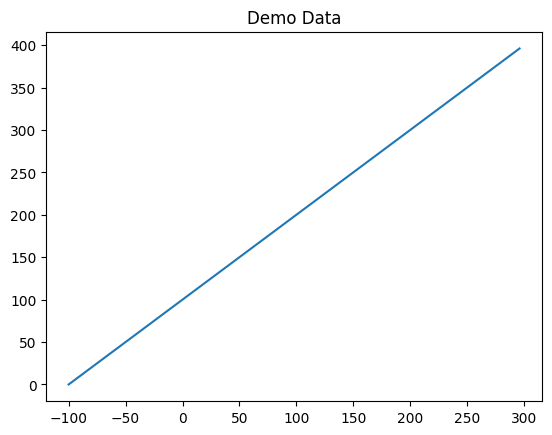

In [ ]:
X = tf.range(-100, 300,4)
y = tf.range(0,400,4)
plt.plot(X,y);plt.title("Demo Data");

In [ ]:
def divide_to_sets(X: np.array, y: np.array, val_cut: float, test_cut: float):
    validation_size = int(len(X) * val_cut)
    X_val = np.array(X[-validation_size:])
    y_val = np.array(y[-validation_size:])
    X_train, X_test, y_train, y_test = train_test_split(np.array(X[:-validation_size]),
                                                        np.array(y[:-validation_size]),
                                                        test_size=test_cut,
                                                        shuffle=True)
    return X_train, X_test, y_train, y_test, X_val, y_val

In [ ]:
X_train, X_test, y_train, y_test, X_val, y_val  = divide_to_sets(X,y, val_cut=0.1, test_cut=0.25)

## Model 3

In [ ]:
# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu", name="FCLayer_1"),
    tf.keras.layers.Dense(100, activation="relu", name="FCLayer_2"),
    tf.keras.layers.Dense(100, activation="relu", name="FCLayer_3"),
    tf.keras.layers.Dense(1, name="OutputLayer")
], name="Model_3")
# Compile the model
model_3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                loss=tf.keras.losses.mae,
                metrics=tf.keras.metrics.mae)

In [ ]:
# Fit the model
model_3_history = model_3.fit(tf.expand_dims(X_train, axis=-1), y_train,
            validation_data=(tf.expand_dims(X_test, axis=-1), y_test),
            epochs=32,
            batch_size=1,
            verbose=1)

Epoch 1/32
67/67 [==============================] - 2s 8ms/step - loss: 79.1415 - mean_absolute_error: 79.1415 - val_loss: 37.4441 - val_mean_absolute_error: 37.4441
Epoch 2/32
67/67 [==============================] - 0s 5ms/step - loss: 47.3859 - mean_absolute_error: 47.3859 - val_loss: 35.9461 - val_mean_absolute_error: 35.9461
Epoch 3/32
67/67 [==============================] - 0s 5ms/step - loss: 44.5737 - mean_absolute_error: 44.5737 - val_loss: 35.2850 - val_mean_absolute_error: 35.2850
Epoch 4/32
67/67 [==============================] - 0s 4ms/step - loss: 45.5531 - mean_absolute_error: 45.5531 - val_loss: 35.3022 - val_mean_absolute_error: 35.3022
Epoch 5/32
67/67 [==============================] - 0s 5ms/step - loss: 44.5303 - mean_absolute_error: 44.5303 - val_loss: 35.4261 - val_mean_absolute_error: 35.4261
Epoch 6/32
67/67 [==============================] - 0s 5ms/step - loss: 44.9780 - mean_absolute_error: 44.9780 - val_loss: 34.8809 - val_mean_absolute_error: 34.8809
Epoc

In [ ]:
model_3.summary()

Model: "Model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 FCLayer_1 (Dense)           (1, 100)                  200       
                                                                 
 FCLayer_2 (Dense)           (1, 100)                  10100     
                                                                 
 FCLayer_3 (Dense)           (1, 100)                  10100     
                                                                 
 OutputLayer (Dense)         (1, 1)                    101       
                                                                 
Total params: 20,501
Trainable params: 20,501
Non-trainable params: 0
_________________________________________________________________


## Model Summary Description
* **Total params** - total number of parameters in the model
* **Trainable params** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable params** - these parameters are not updated during training (this is typical when you bring in already learnt patterns or patameters from other model during **trasfer leraning**).

**Resources**

1 - [Fundamentals of Neural Networks](https://wandb.ai/site/articles/fundamentals-of-neural-networks)

2 - [Deep Learning Deployment Fundamentals](https://deeplizard.com/learn/video/8d-9SnGt5E0)

3 - [MIT Introduction to Deep Learning](https://www.youtube.com/watch?v=QDX-1M5Nj7s&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI)

## Model 3 Evaluation

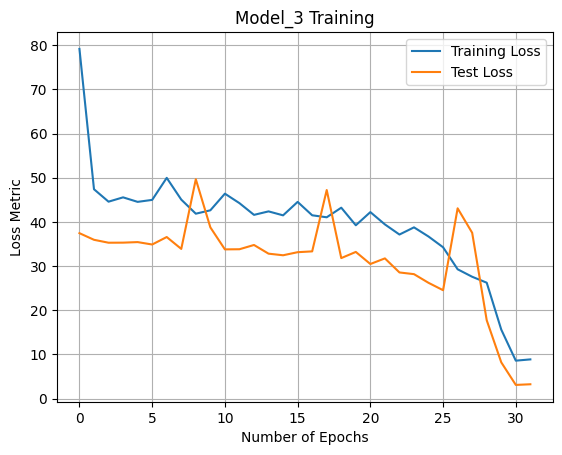

In [ ]:
plt.plot(model_3_history.history["loss"])
plt.plot(model_3_history.history["val_loss"])
plt.xlabel("Number of Epochs")
plt.ylabel("Loss Metric")
plt.title("Model_3 Training")
plt.legend(["Training Loss", "Test Loss"], loc="best")
plt.grid();

1/1 [==============================] - 0s 79ms/step


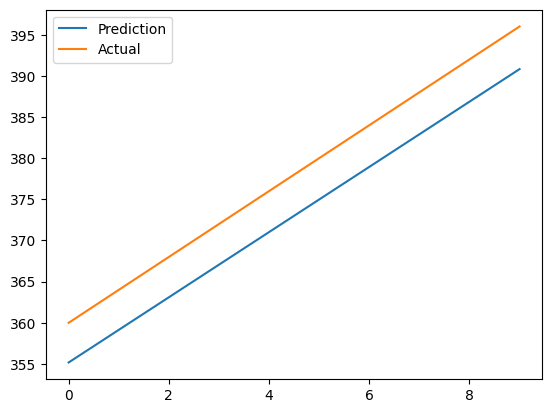

In [ ]:
model_3_preds = model_3.predict(X_val)
plt.plot(model_3_preds)
plt.plot(y_val)
plt.legend(["Prediction", "Actual"]);

In [ ]:
errors=[]
for a,p in zip(y_val, model_3_preds):
  errors.append(round(float((a-p)[0]),3))
model_3_eval = pd.DataFrame({"actual":tf.squeeze(y_val),
              "prediction":tf.squeeze(model_3_preds),
              "errors":errors})
model_3_eval.head()

,actual,prediction,errors
0,360,355.181396,4.819
1,364,359.141296,4.859
2,368,363.101135,4.899
3,372,367.061035,4.939
4,376,371.020874,4.979


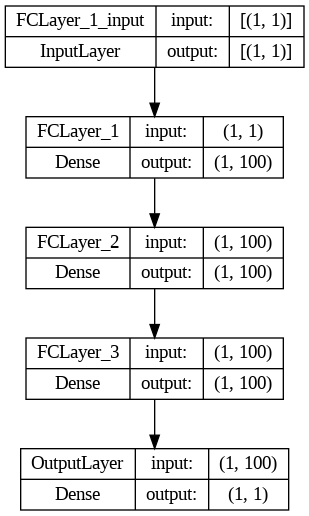

In [ ]:
# Model Architecture
plot_model(model_3,
           show_shapes=True)

# Model Evaluation Cont.

In [ ]:
def plot_predictions(train_data,
                     train_labels,
                     test_data,
                     test_labels,
                     val_data,
                     predictions):

  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", label="Training Data")
  plt.scatter(test_data, test_labels, c="g", label="Test Data")
  plt.scatter(val_data, predictions, c="r", label="Test Data")
  plt.legend();

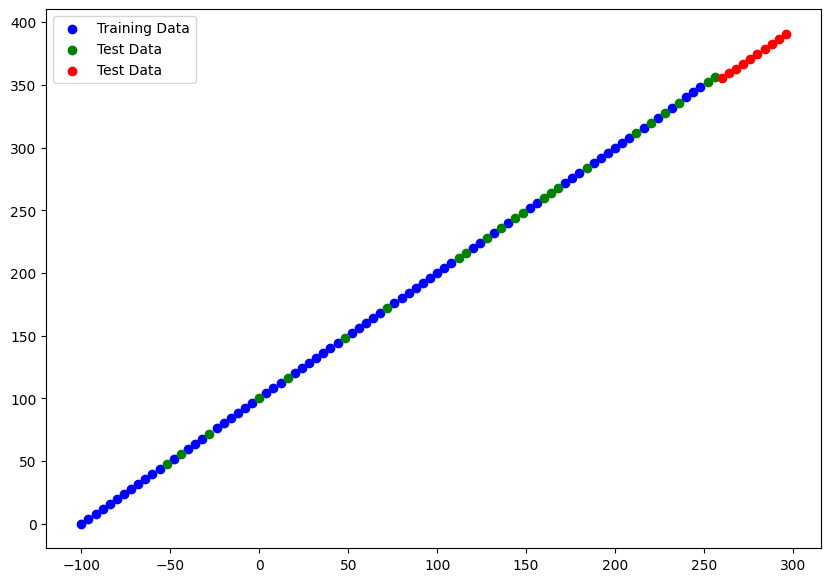

In [ ]:
plot_predictions(X_train,
                 y_train,
                 X_test,
                 y_test,
                 X_val,
                 model_3_preds)

## Regression Evaluation Metrics

Depending on the problem you are working on, there will be different evaluation metrics to evaluate your model's performance. Since we are working on a regression task here, here are some of the commonly-used regression metrics when evaluating a model. There are also some other metrics variations, such as root-mean squared error.


1 - **Mean Absolute Error (MAE)** - MAE is the average of all absolute errors. The formula is:


Mean Absolute Error (MAE):

 * $MAE = \frac{\sum_{i=1}^{n} |Y_i - \hat{y}_i|}{n}$

Where:
- $Y_i$ and $\hat{y}$ are $D$-dimensional vectors, and $Y_i$ and \($\hat{y}_i$) denote the values on the $i^{th}$ dimension of $Y_i$ and $\hat{y}$ respectively.
- $n$ is the number of errors.
- $\sum$ represents the summation symbol, which means "add them all up".
- $|Y_i - \hat{y}_i|$ represents the absolute errors.



2 - **Mean Squared Error** - MSE assesses the average squared difference between the observed and predicted values. When a model has no error, the MSE equals zero. As model error increases, its value increases. The mean squared error is also known as the mean squared deviation (MSD).

Formula:

 * $MSE = \frac{\sum_{i=1}^{n}(Y_i-\hat{y_i})^2}{n}$

where;

* ${n}$	=	number of data points
* $Y_{i}$	=	observed values
* $\hat{Y}_{i}$	=	predicted values


---

**Code Examples**



```Python
tf.keras.losses.MAE()
tf.metrics.mean_absolute_error()

tf.keras.losses.MSE()
tf.metrics.mean_squared_error()

```



**Resources**

1 - [Keras API Regression metrics](https://keras.io/api/metrics/regression_metrics/)

2 - [regression_metrics.py (GitHub)](https://github.com/keras-team/keras/blob/v2.13.1/keras/metrics/regression_metrics.py#L323)

3 - [Absolute Error & Mean Absolute Error](https://www.statisticshowto.com/absolute-error/)

4 - [Mean Squared Error (MSE) by Jim Frost](https://statisticsbyjim.com/regression/mean-squared-error-mse/)


# Model Improvement Experiments

**Improvement areas to consider**

1 - Get More Data - get more examples for the model to train on (more opportunities for model to learn pattern or relationships beween feature and target variables)

2 - Make A larger Model - this might come in the form of more layers or more hidden units in each layer

3 - Train for longer - give your model more of a chance to find patterns in the data

Let's conduct three modelling experiments.

`model_1` - same as the original model, 1 layer, trained for 100 epochs

`model_2` - 2 layers, trained for 100 epochs

# ` Experiment: model_1 `

## Data Creation

In [ ]:
tf.random.set_seed(42)

X = tf.range(-100, 300,2)
y = X + 100
X_train, X_test, y_train, y_test, X_val, y_val = divide_to_sets(X, y, val_cut=0.1, test_cut=0.25)

## Modelling

In [ ]:
tf.random.set_seed(42)
exp_model_1 = tf.keras.Sequential([
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, name="FC_Layer_1")
], name="experiment_model_1")

exp_model_1.compile(loss=tf.keras.losses.mean_absolute_error,
                    optimizer=tf.keras.optimizers.SGD(),
                    metrics=tf.metrics.mean_absolute_error)

exp_model_1_history = exp_model_1.fit(tf.expand_dims(X_train, axis=-1), y_train,
                validation_data=(tf.expand_dims(X_test, axis=-1), y_test),
                epochs=100,
                verbose=1)

Epoch 1/100
5/5 [==============================] - 1s 81ms/step - loss: 176.3348 - mean_absolute_error: 176.3348 - val_loss: 184.9114 - val_mean_absolute_error: 184.9114
Epoch 2/100
5/5 [==============================] - 0s 21ms/step - loss: 176.2711 - mean_absolute_error: 176.2711 - val_loss: 185.4593 - val_mean_absolute_error: 185.4593
Epoch 3/100
5/5 [==============================] - 0s 20ms/step - loss: 176.2073 - mean_absolute_error: 176.2073 - val_loss: 185.6907 - val_mean_absolute_error: 185.6907
Epoch 4/100
5/5 [==============================] - 0s 20ms/step - loss: 176.1431 - mean_absolute_error: 176.1431 - val_loss: 185.7941 - val_mean_absolute_error: 185.7941
Epoch 5/100
5/5 [==============================] - 0s 20ms/step - loss: 176.0785 - mean_absolute_error: 176.0785 - val_loss: 185.8397 - val_mean_absolute_error: 185.8397
Epoch 6/100
5/5 [==============================] - 0s 20ms/step - loss: 176.0134 - mean_absolute_error: 176.0134 - val_loss: 185.8598 - val_mean_absol

## Model Evaluation

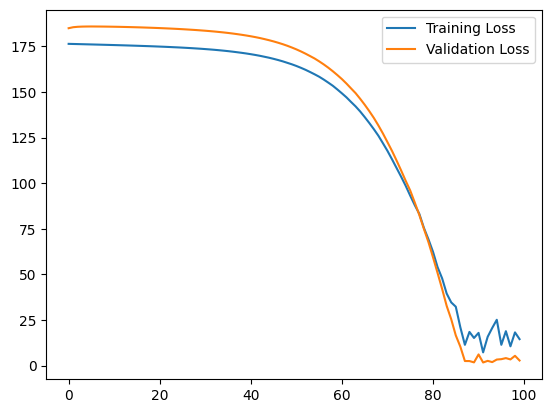

In [ ]:
plt.plot(exp_model_1_history.history["loss"])
plt.plot(exp_model_1_history.history["val_loss"])
plt.legend(["Training Loss", "Validation Loss"]);

In [ ]:
exp_model_1_preds = exp_model_1.predict(tf.expand_dims(X_val, axis=-1))

1/1 [==============================] - 0s 66ms/step


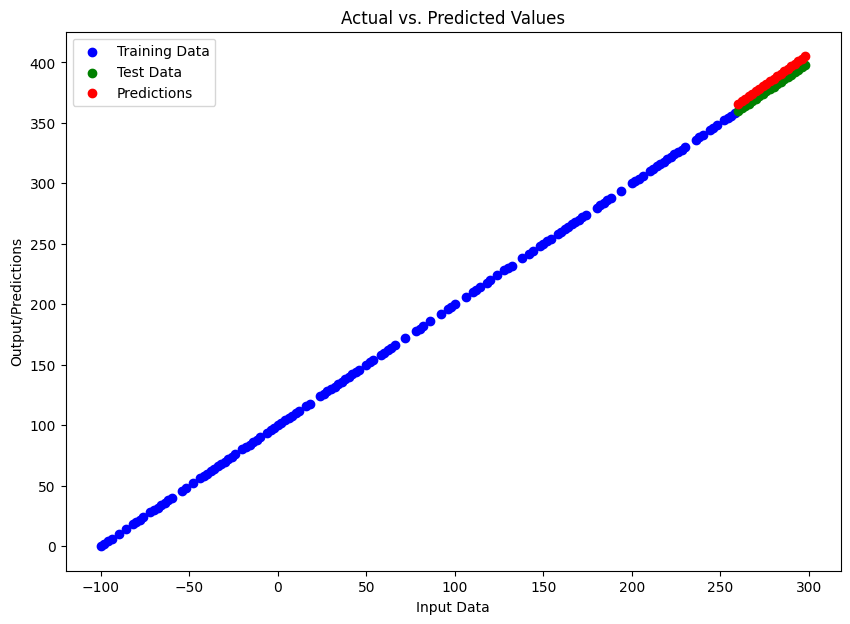

In [ ]:
plot_predictions(X_train, y_train,
                 X_val, y_val,
                 X_val, exp_model_1_preds)

In [ ]:
model_1_results = evaluate_regression(y_val, exp_model_1_preds)

# ` Experiment: model_2 `

## Data Creation

In [ ]:
tf.random.set_seed(42)

X = tf.range(-100, 300,2)
y = X + 100

X_train, X_test, y_train, y_test, X_val, y_val = divide_to_sets(X, y, val_cut=0.1, test_cut=0.30)

## Modelling

In [ ]:
tf.random.set_seed(42)
exp_model_2 = tf.keras.Sequential([
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, name="FC_Layer_1"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, name="FC_Layer_2")
], name="experiment_model_2")


exp_model_2.compile(loss=tf.keras.losses.mean_absolute_error,
                    optimizer=tf.keras.optimizers.SGD(),
                    metrics=tf.metrics.mean_absolute_error)

exp_model_2_history = exp_model_2.fit(tf.expand_dims(X_train, axis=-1), y_train,
                validation_data=(tf.expand_dims(X_test, axis=-1), y_test),
                epochs=100,
                verbose=1)

Epoch 1/100
4/4 [==============================] - 2s 163ms/step - loss: 180.9471 - mean_absolute_error: 180.9471 - val_loss: 176.1071 - val_mean_absolute_error: 176.1071
Epoch 2/100
4/4 [==============================] - 0s 26ms/step - loss: 180.8707 - mean_absolute_error: 180.8707 - val_loss: 175.4703 - val_mean_absolute_error: 175.4703
Epoch 3/100
4/4 [==============================] - 0s 27ms/step - loss: 180.7789 - mean_absolute_error: 180.7789 - val_loss: 175.1243 - val_mean_absolute_error: 175.1243
Epoch 4/100
4/4 [==============================] - 0s 27ms/step - loss: 180.6882 - mean_absolute_error: 180.6882 - val_loss: 174.8777 - val_mean_absolute_error: 174.8777
Epoch 5/100
4/4 [==============================] - 0s 29ms/step - loss: 180.5950 - mean_absolute_error: 180.5950 - val_loss: 174.6788 - val_mean_absolute_error: 174.6788
Epoch 6/100
4/4 [==============================] - 0s 26ms/step - loss: 180.5011 - mean_absolute_error: 180.5011 - val_loss: 174.5066 - val_mean_abso

In [ ]:
exp_model_2.summary()

Model: "experiment_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_3 (Batc  (None, 1)                4         
 hNormalization)                                                 
                                                                 
 FC_Layer_1 (Dense)          (None, 10)                20        
                                                                 
 batch_normalization_4 (Batc  (None, 10)               40        
 hNormalization)                                                 
                                                                 
 FC_Layer_2 (Dense)          (None, 1)                 11        
                                                                 
Total params: 75
Trainable params: 53
Non-trainable params: 22
_________________________________________________________________


## Model Evaluation

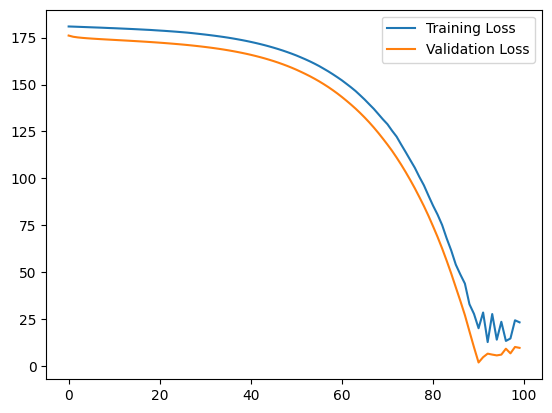

In [ ]:
plt.plot(exp_model_2_history.history["loss"])
plt.plot(exp_model_2_history.history["val_loss"])
plt.legend(["Training Loss", "Validation Loss"]);

In [ ]:
exp_model_2_preds = exp_model_2.predict(X_val)

1/1 [==============================] - 0s 112ms/step


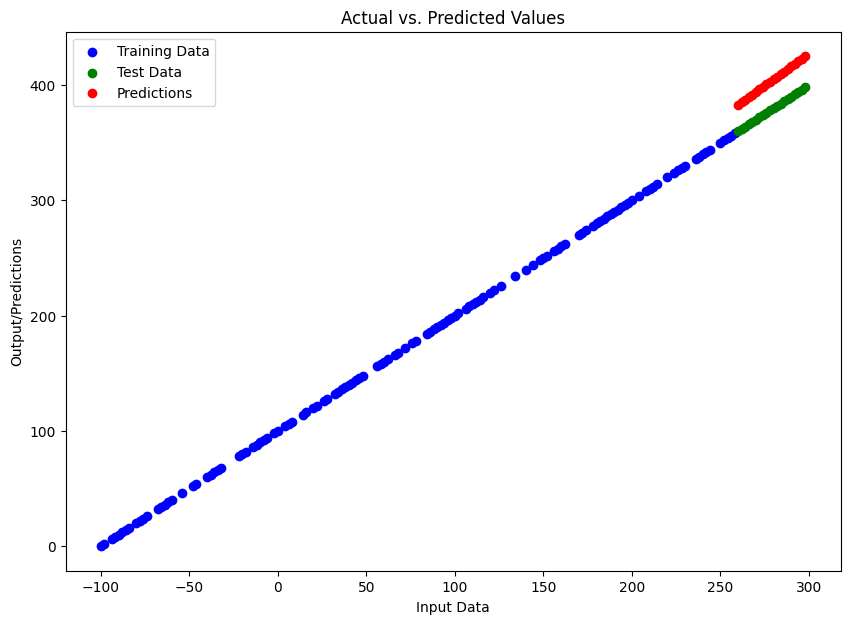

In [ ]:
plot_predictions(X_train, y_train,
                 X_val, y_val,
                 X_val, tf.squeeze(exp_model_2_preds))

In [ ]:
model_2_results = evaluate_regression(y_val, exp_model_2_preds)

# Saving Models


In [ ]:
model_results = pd.concat([model_1_results, model_2_results],
                          axis=0,
                          keys=("model_1_results", "model_2_results"))

model_results.sort_values(by="rmse", ascending=True)

,,mae,mse,rmse
model_1_results,0,6.449922,41.768623,6.462865
model_2_results,0,24.959787,624.552734,24.991053


In [ ]:
# save the best model
exp_model_1.save(f"best_regression_model_{round(float(model_1_results['rmse'][0]),3)}.h5")

In [ ]:
try:
    best_regression_model = tf.keras.models.load_model("/content/best_regression_model_6.463.h5")
    if best_regression_model:
      print("Model Loaded Successfuly", "\n")

      best_regression_model.summary()
except FileNotFoundError as e:
    print(f"\nModel Not Found: {e}")

Model Loaded Successfuly 

Model: "experiment_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_2 (Batc  (None, 1)                4         
 hNormalization)                                                 
                                                                 
 FC_Layer_1 (Dense)          (None, 1)                 2         
                                                                 
Total params: 6
Trainable params: 4
Non-trainable params: 2
_________________________________________________________________


In [ ]:
# Double check on the loaded-model
loaded_model_preds = best_regression_model.predict(tf.expand_dims(X_val, axis=-1))
loaded_model_results = evaluate_regression(y_val, loaded_model_preds)
assert loaded_model_results["rmse"][0] == model_1_results["rmse"][0], "RMSE results are not identical"

1/1 [==============================] - 0s 65ms/step
